In [112]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [113]:
students = pd.read_csv('../datasets/Student_performance_data _.csv')

In [114]:
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [115]:
students.drop(columns=['StudentID'], inplace=True)

In [116]:
students.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [117]:
# Mapping dictionaries for each categorical column
label_maps = {
    "Gender": {
        0: "Male",
        1: "Female"
    },
    "Ethnicity": {
        0: "Caucasian",
        1: "African American",
        2: "Asian",
        3: "Other"
    },
    "ParentalEducation": {
        0: "None",
        1: "High School",
        2: "Some College",
        3: "Bachelor's",
        4: "Higher"
    },
    "ParentalSupport": {
        0: "None",
        1: "Low",
        2: "Moderate",
        3: "High",
        4: "Very High"
    },
    "Tutoring": {0: "No", 1: "Yes"},
    "Extracurricular": {0: "No", 1: "Yes"},
    "Sports": {0: "No", 1: "Yes"},
    "Music": {0: "No", 1: "Yes"},
    "Volunteering": {0: "No", 1: "Yes"},
    "GradeClass": {
        0: "A",
        1: "B",
        2: "C",
        3: "D",
        4: "F"
    }
}
# Column descriptions (based on your dataset dictionary)
column_descriptions = {
    "StudentID": "Unique identifier for each student.",
    "Age": "Age of the student.",
    "Gender": "Student gender.",
    "Ethnicity": "Student ethnicity.",
    "ParentalEducation": "Highest level of parental education.",
    "StudyTimeWeekly": "Average weekly study time in hours.",
    "Absences": "Total number of school absences.",
    "Tutoring": "Indicates whether the student receives tutoring.",
    "ParentalSupport": "Level of parental support for the student.",
    "Extracurricular": "Participation in extracurricular activities.",
    "Sports": "Participation in sports programs.",
    "Music": "Participation in music activities.",
    "Volunteering": "Participation in volunteering or community service.",
    "GPA": "Student’s Grade Point Average.",
    "GradeClass": "Overall academic performance represented by letter grade."
}

def plot_multiple_hists(df, columns, label_maps=None, column_descriptions=None,
                        ncols=3, figsize=(15, 8)):
    """
    Creates subplots of histograms / countplots side-by-side
    using label maps and descriptive titles.
    Automatically respects the order of label_maps for categorical columns.
    """
    nrows = math.ceil(len(columns) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        col_data = df[col]
        desc = column_descriptions.get(col, col)

        # Apply mapping if exists
        if label_maps and col in label_maps:
            # convert to int safely before mapping
            col_data = pd.to_numeric(col_data, errors='coerce').fillna(-1).astype(int)
            data = col_data.map(label_maps[col])
            plot_type = "categorical"

            # ✅ Use order from mapping keys
            order = [label_maps[col][k] for k in label_maps[col].keys()]
        else:
            data = col_data
            plot_type = "numeric" if pd.api.types.is_numeric_dtype(col_data) else "categorical"
            order = sorted(data.dropna().unique()) if plot_type == "categorical" else None

        # Plot
        if plot_type == "numeric":
            sns.histplot(data.dropna(), bins=10, kde=True,
                         color='skyblue', edgecolor='black', ax=ax)
            ax.set_ylabel("Frequency")
        else:
            sns.countplot(x=data, color='lightgreen', order=order, ax=ax)
            ax.set_ylabel("Count")

        ax.set_xlabel(col)
        ax.set_title(f"{col} — {desc}", fontsize=10)

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

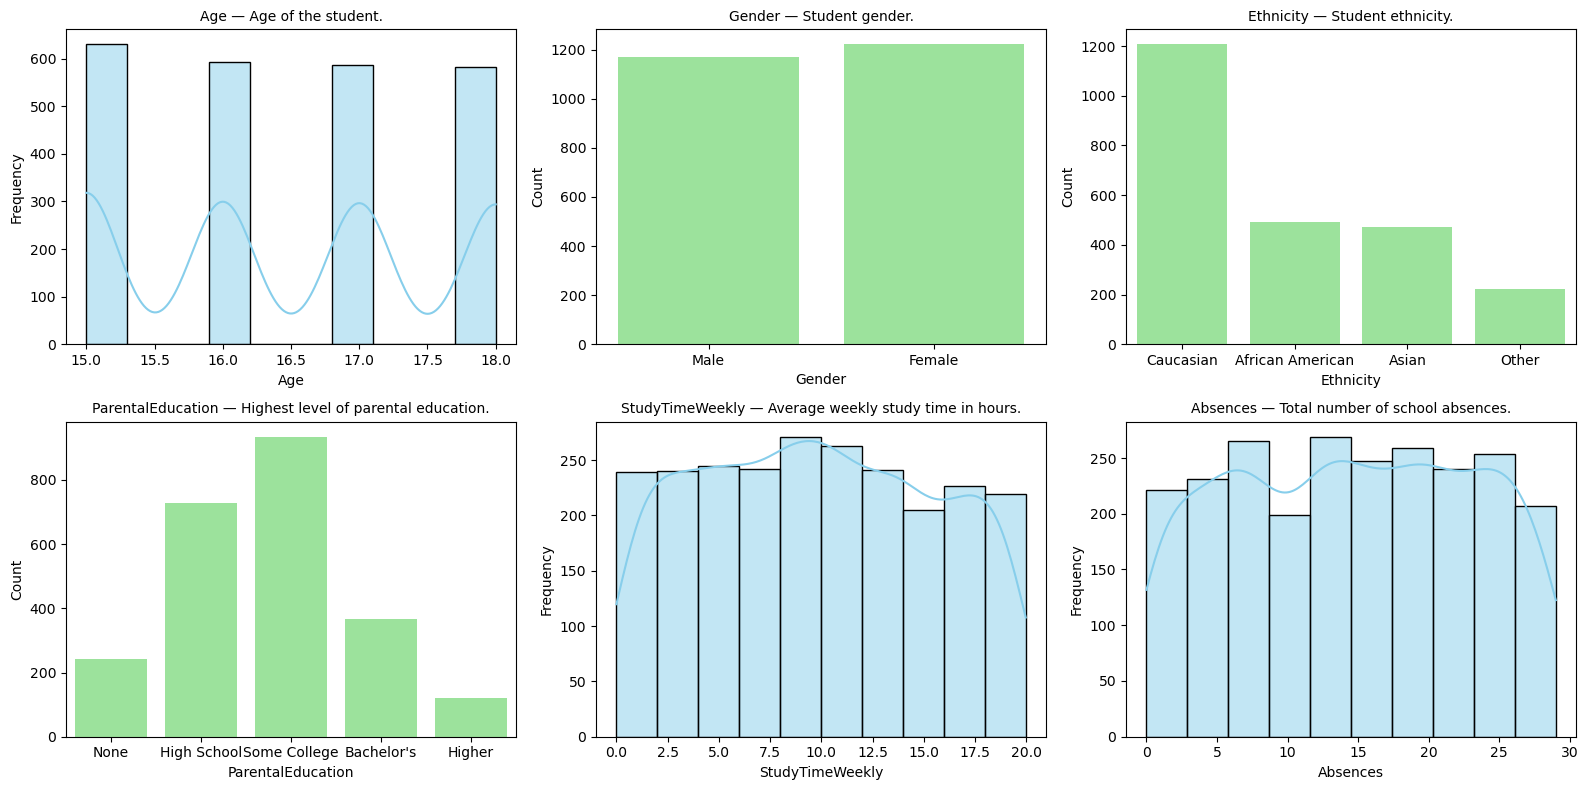

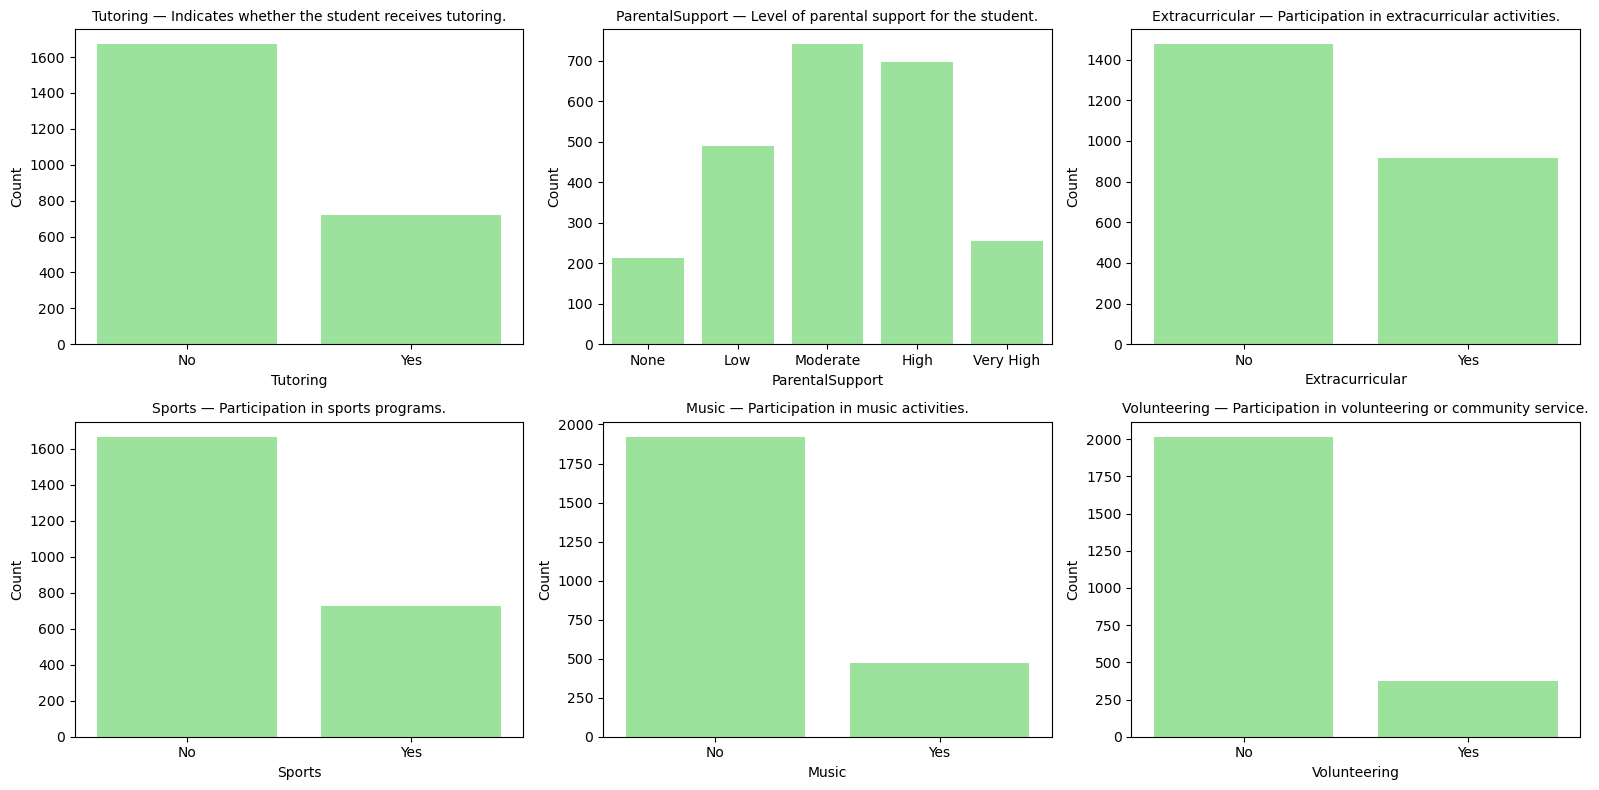

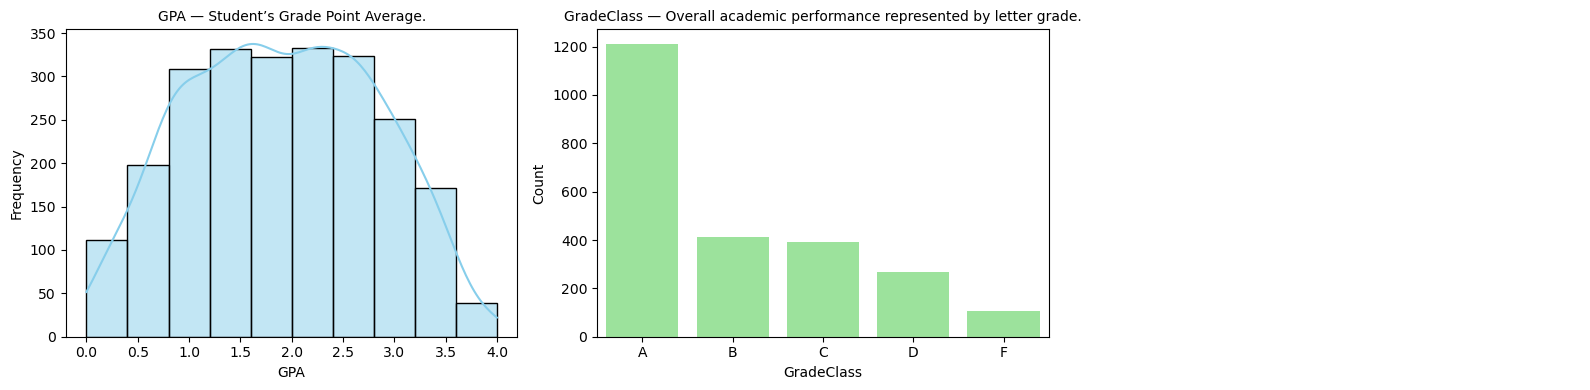

In [118]:
plot_multiple_hists(
    students,
    columns=students.columns[:6],
    label_maps=label_maps,
    column_descriptions=column_descriptions,
    ncols=3,
    figsize=(16, 8)
)
plot_multiple_hists(
    students,
    columns=students.columns[6:12],
    label_maps=label_maps,
    column_descriptions=column_descriptions,
    ncols=3,
    figsize=(16, 8)
)

plot_multiple_hists(
    students,
    columns=students.columns[12:],
    label_maps=label_maps,
    column_descriptions=column_descriptions,
    ncols=3,
    figsize=(16, 4)
)